[View in Colaboratory](https://colab.research.google.com/github/thimotio/ExpertSystem/blob/master/Fuzzy_ExperSystem_Stocks.ipynb)

# IHM APC - SISTEMA ESPECIALISTA PARA CONTROLE DE PROCESSO

## CASO DE USO: BRITAGEM E PENEIRAMENTO - VALE ITM-I

- VERSÃO 01.00.03

In [10]:
!pip   install  -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.3.1)


### Definição do Problema: 

> A Britagem e Peneiramento é uma etapa de beneficiamento mineral que tem como objetivo adequar a granulometria do material enviado da Mina (ROM ou Run of Mine) para as etapas subsequentes de beneficiamento.

### Proposta

1. Controlar o Set-Point de vazão na TC-09 com intuito de maximizar a eficiencia de peneiramento e britagem 
2. aumentar rendimento do circuito reduzindo paradas do sistema de alimentação devido nivel alto nos silos
3. aumentar eficiencia do peneiramento conforme condição operacional (umidade, carga circulante, eficiencia do britador)

### Entradas

1. Nivel dos Silos das peneiras
2. Corrente do TC-05
3. Corrente dos Britadores
4. Massa na saida do Peneiramento
5.  Nível dos Silos dos Britadores
6. Nivel dos Silos 01, 02, 03 e 04
7. 

>etc


### Saídas

1. SP da TC-09
2. Alimentação nova no Circuito (Funcionamento dos AL' 01 e 02)



### Formulação do Problema


### Circuito

![Circuito](./Britagem Novo.png)




In [0]:
"Carregando modulos do Python"
import numpy as np
import skfuzzy as fuzz
import matplotlib 
import matplotlib.pyplot
from skfuzzy import control as ctrl


# Variáveis internas do Controle

In [0]:
Carga_Circulante_Virtual = 0.0
Eficiencia_Peneiramento_Virtual = 0.0

# Definição de Funções para Normalização de Funções de Pertinência
### Define uma variável de entrada Fuzzy com distribuições gaussianas. 
> Exemplo de Uso

<pre>
Names = ['Baixo', 'Medio', 'Alto']
Nivel_01 = NewAntecedentFuzzy_Exponencial("Nivel_Silo_01", 0, 25, 0.05, Names)
Nivel_01.view()
</pre>

In [0]:
def NewAntecedentFuzzy_Exponencial(Name, vmin, vmax, precision, Curvas ):
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, quarter1, std )
        FuzzyVar[Curvas[2]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[3]] = fuzz.gaussmf(FuzzyVar.universe, quarter2, std )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

In [0]:
def NewConsequentFuzzy_Exponencial(Name, vmin, vmax, precision, Curvas ):
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, quarter1, std )
        FuzzyVar[Curvas[2]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[3]] = fuzz.gaussmf(FuzzyVar.universe, quarter2, std )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

### Define uma variável de entrada Fuzzy com distribuições triangular. 
> Exemplo de Uso

<pre>
Names = ['MBaixo','Baixo', 'Neutro', 'Alto','MAlto']
inc_Taxa_Alm = NewConsequenceFuzzy_Triangular("inc_Taxa_Alm", -10, 10, 0.05, Names)
inc_Taxa_Alm.view()
</pre>


In [0]:
def NewConsequenceFuzzy_Triangular(Name, vmin, vmax, precision, Curvas ):
    #define the new  Fuzzy Variabel and set 
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, mean] )
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, mean, vmax] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [mean, vmax, vmax] )

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, quarter1])
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, quarter1, mean] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [quarter1, mean, quarter2] )
        FuzzyVar[Curvas[3]] = fuzz.trimf(FuzzyVar.universe, [mean, quarter2, vmax] )
        FuzzyVar[Curvas[4]] = fuzz.trimf(FuzzyVar.universe, [quarter2, vmax, vmax] )
           
    
    return FuzzyVar

In [0]:
def NewAntecedentFuzzy_Triangular(Name, vmin, vmax, precision, Curvas ):
    #define the new  Fuzzy Variabel and set 
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, mean] )
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, mean, vmax] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [mean, vmax, vmax] )

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, quarter1])
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, quarter1, mean] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [quarter1, mean, quarter2] )
        FuzzyVar[Curvas[3]] = fuzz.trimf(FuzzyVar.universe, [mean, quarter2, vmax] )
        FuzzyVar[Curvas[4]] = fuzz.trimf(FuzzyVar.universe, [quarter2, vmax, vmax] )
           
    
    return FuzzyVar

In [0]:
def NewConsequenceFuzzy_Central(Name, vmin, vmax, around , precision, Curvas ):
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    around *= (vmax - vmin)
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean-around)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean+around, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, vmin, quarter1, quarter1, mean-around)
        FuzzyVar[Curvas[2]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[3]] = fuzz.pimf(FuzzyVar.universe, mean+around, quarter2, quarter2 , vmax )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

In [0]:
def NewAntecedentFuzzy_Central(Name, vmin, vmax, around , precision, Curvas ):
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    around *= (vmax - vmin)
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean-around)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean+around, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, vmin, quarter1, quarter1, mean-around)
        FuzzyVar[Curvas[2]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[3]] = fuzz.pimf(FuzzyVar.universe, mean+around, quarter2, quarter2 , vmax )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

# VARIÁVEIS DO MODELO

In [0]:
#Imputs

Names = ['Baixo', 'Medio', 'Alto']
Corrente_BR03 = NewAntecedentFuzzy_Exponencial("Corrente_BR03", 20, 40, 0.5 , Names)
Corrente_BR04 = NewAntecedentFuzzy_Exponencial("Corrente_BR04", 20, 40, 0.5 , Names)
Nivel_Silo_03 = NewAntecedentFuzzy_Central("Nivel_Silo_03", 40, 95, 0.05, 0.5, Names)
TC_09_erro = NewAntecedentFuzzy_Exponencial("TC_09_erro", -100, 100, 1, Names)
Disponibilidade_ROM = NewAntecedentFuzzy_Central("Disponibilidade_ROM", 30, 80, 0.1, 1, Names)
Capacidade_SL03 = NewAntecedentFuzzy_Central("Capacidade_SL03", -100, 100, 0.1, 1, Names)

Names = ['Reduzindo', 'Estavel', 'Aumentando']
Nivel_Silo_03_grad = NewAntecedentFuzzy_Exponencial("Nivel_Silo_03_Grad", -10, 10, 0.5, Names)
Nivel_Silo_04_Grad = NewAntecedentFuzzy_Central("Nivel_Silo_04_Grad", -10, 10, 0.05, 0.1, Names)
TC_09_grad = NewAntecedentFuzzy_Exponencial("TC_09_Grad", -100, 100, 1, Names)
Corrente_BR03_Grad = NewAntecedentFuzzy_Exponencial("Corrente_BR03_Grad", -3, 3, 0.1, Names)
Corrente_BR04_Grad = NewAntecedentFuzzy_Exponencial("Corrente_BR04_Grad", -3, 3, 0.1, Names)
Corrente_TC_05_Grad = NewAntecedentFuzzy_Exponencial("Corrente_TC_05_Grad", -3, 3, 0.1, Names)
Disponibilidade_ROM_Grad = NewAntecedentFuzzy_Exponencial("Disponibilidade_ROM_Grad", -10, 10, 0.1, Names)


#Variáveis Internas
Names = ['Baixo', 'Medio', 'Alto']
Eficiencia_Peneiramento_Virtual = NewAntecedentFuzzy_Central("Eficiencia_Peneiramento_Virtual", -100, 100, 0.05, 0.5, Names)
Carga_Circulante_Virtual = NewAntecedentFuzzy_Central("Carga_Circulante_Virtual", -100, 100, 0.05, 0.5, Names)

Capacidade_SL_03_Virtual = NewAntecedentFuzzy_Central("Capacidade_SL_03_Virtual", -100, 100, 0.05, 0.5, Names)
Eficiencia_Peneiramento_Virtual = NewAntecedentFuzzy_Central("Eficiencia_Peneiramento_Virtual", -100, 100, 0.05, 0.5, Names)
Balanco_Massa_Virtual = NewAntecedentFuzzy_Central("Balanco_Massa_Virtual", -100, 100, 0.05, 0.5, Names)



#Outputs
Names = ['Muito_Negativo', 'Negativo', 'Nulo', 'Positivo', 'Muito_Positivo']
Carga_Circulante_BR_Grad_Inc = NewConsequentFuzzy_Exponencial("Carga_Circulante_BR_Grad", -10, 10, 0.1, Names)
Eficiencia_BR03_Grad_Inc = NewConsequentFuzzy_Exponencial("Eficiencia_BR03_Grad", -10, 10, 0.1, Names)
Eficiencia_BR04_Grad_Inc = NewConsequentFuzzy_Exponencial("Eficiencia_BR04_Grad", -10, 10, 0.1, Names)
Capacidade_SL_03_Inc = NewConsequenceFuzzy_Triangular("Capacidade_SL_03", -100, 100, 0.05, Names)
Eficiencia_Peneiramento_Inc = NewConsequentFuzzy_Exponencial("Eficiencia_Peneiramento", -100, 100, 0.05, Names)
Restricao_Massa_Inc = NewConsequenceFuzzy_Triangular("Restricao_Massa", -100, 100, 0.05, Names)
Balanco_Massa_Inc = NewConsequenceFuzzy_Triangular("Balanco_Massa", -100, 100, 0.05, Names)
SP_TC09_Inc = NewConsequenceFuzzy_Triangular("SP_TC09", -100, 100, 0.05, Names)
Disponibilidade_ROM_Inc = NewConsequenceFuzzy_Triangular("Disponibilidade_ROM_Inc", -100, 100, 0.05, Names)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


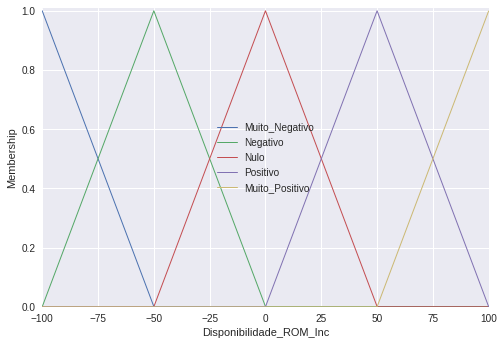

In [20]:
Disponibilidade_ROM_Inc.view()

# Carga Circulante Virtual

A carga circulante virtual é uma variável intermediária que recebe incrmentos de duas variáveis de saída de controle

1. Eficiencia da Britagem
2. Carga Circulante


## 1. Controle de a Eficiencia da Britagem

A eficiencia da britagem é determinada por duas variáveis:

1. Corrente dos Britadores
2. Gradiente da Corrente dos Britadores

A regra de controle segue a lógica abaixo:



<table class=MsoNormalTable border=1 cellspacing=0 cellpadding=0 width=405
 style='width:304.05pt;margin-left:.1pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-padding-alt:
 0cm 3.5pt 0cm 3.5pt;mso-border-insideh:.5pt solid windowtext;mso-border-insidev:
 .5pt solid windowtext'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt'>
  <td width=405 nowrap colspan=4 valign=bottom style='width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><b><span style='font-size:14.0pt;
  mso-bidi-font-size:11.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:
  "Times New Roman";mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;
  color:white;mso-themecolor:background1;mso-fareast-language:PT-BR'>Eficiência
  de Britagem - Incremento</span></b><b><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1;height:15.0pt'>
  <td width=133 nowrap rowspan=2 style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Corrente
  BR<o:p></o:p></span></p>
  </td>
  <td width=272 nowrap colspan=3 style='width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Corrente
  <span class=SpellE><span class=GramE>BR.grad</span></span><i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2;height:30.8pt'>
  <td width=104 nowrap style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width=76 nowrap style='width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Estável<o:p></o:p></span></i></p>
  </td>
  <td width=92 nowrap style='width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Diminuindo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3;height:15.0pt'>
  <td width=133 nowrap valign=bottom style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Alto<o:p></o:p></span></i></p>
  </td>
  <td width=104 nowrap style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>++<o:p></o:p></span></p>
  </td>
  <td width=76 nowrap style='width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>+<o:p></o:p></span></p>
  </td>
  <td width=92 style='width:69.3pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:white;mso-background-themecolor:background1;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='font-family:"Cambria Math",serif;
  mso-fareast-font-family:"Times New Roman";mso-bidi-font-family:"Cambria Math";
  color:black;mso-fareast-language:PT-BR'>&#8709;</span><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4;height:15.0pt'>
  <td width=133 nowrap valign=bottom style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Normal<o:p></o:p></span></i></p>
  </td>
  <td width=104 nowrap style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>+<o:p></o:p></span></p>
  </td>
  <td width=76 style='width:56.8pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:background1;
  mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='font-family:"Cambria Math",serif;
  mso-fareast-font-family:"Times New Roman";mso-bidi-font-family:"Cambria Math";
  color:black;mso-fareast-language:PT-BR'>&#8709;</span><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'><o:p></o:p></span></p>
  </td>
  <td width=92 nowrap style='width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>-<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt'>
  <td width=133 nowrap valign=bottom style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Baixo<o:p></o:p></span></i></p>
  </td>
  <td width=104 style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='font-family:"Cambria Math",serif;
  mso-fareast-font-family:"Times New Roman";mso-bidi-font-family:"Cambria Math";
  color:black;mso-fareast-language:PT-BR'>&#8709;</span><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'><o:p></o:p></span></p>
  </td>
  <td width=76 nowrap style='width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>-<o:p></o:p></span></p>
  </td>
  <td width=92 nowrap style='width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>--<o:p></o:p></span></p>
  </td>
 </tr>
</table>

In [0]:
### REGRAS DE EFICIENCIA DA BRITAGEM 03

rule1 = ctrl.Rule( Corrente_BR03['Baixo'] & Corrente_BR03_Grad['Reduzindo'], Eficiencia_BR03_Grad_Inc['Muito_Negativo'])  
rule2 = ctrl.Rule( Corrente_BR03['Baixo'] & Corrente_BR03_Grad['Estavel'], Eficiencia_BR03_Grad_Inc['Negativo'])  
rule3 = ctrl.Rule( Corrente_BR03['Baixo'] & Corrente_BR03_Grad['Aumentando'], Eficiencia_BR03_Grad_Inc['Nulo']) 


rule4 = ctrl.Rule( Corrente_BR03['Medio'] & Corrente_BR03_Grad['Reduzindo'], Eficiencia_BR03_Grad_Inc['Negativo'])  
rule5 = ctrl.Rule( Corrente_BR03['Medio'] & Corrente_BR03_Grad['Estavel'], Eficiencia_BR03_Grad_Inc['Nulo'])  
rule6 = ctrl.Rule( Corrente_BR03['Medio'] & Corrente_BR03_Grad['Aumentando'], Eficiencia_BR03_Grad_Inc['Positivo']) 

rule7 = ctrl.Rule( Corrente_BR03['Alto'] & Corrente_BR03_Grad['Reduzindo'], Eficiencia_BR03_Grad_Inc['Nulo'])  
rule8 = ctrl.Rule( Corrente_BR03['Alto'] & Corrente_BR03_Grad['Estavel'], Eficiencia_BR03_Grad_Inc['Positivo'])  
rule9 = ctrl.Rule( Corrente_BR03['Alto'] & Corrente_BR03_Grad['Aumentando'], Eficiencia_BR03_Grad_Inc['Muito_Positivo']) 

Rules_Eficiencia_BR03_Grad = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Eficiencia_BR03_Grad = ctrl.ControlSystemSimulation(Rules_Eficiencia_BR03_Grad)



In [0]:
### REGRAS DE EFICIENCIA DA BRITAGEM 04

rule1 = ctrl.Rule( Corrente_BR04['Baixo'] & Corrente_BR04_Grad['Reduzindo'], Eficiencia_BR04_Grad_Inc['Muito_Negativo'])  
rule2 = ctrl.Rule( Corrente_BR04['Baixo'] & Corrente_BR04_Grad['Estavel'], Eficiencia_BR04_Grad_Inc['Negativo'])  
rule3 = ctrl.Rule( Corrente_BR04['Baixo'] & Corrente_BR04_Grad['Aumentando'], Eficiencia_BR04_Grad_Inc['Nulo']) 


rule4 = ctrl.Rule( Corrente_BR04['Medio'] & Corrente_BR04_Grad['Reduzindo'], Eficiencia_BR04_Grad_Inc['Negativo'])  
rule5 = ctrl.Rule( Corrente_BR04['Medio'] & Corrente_BR04_Grad['Estavel'], Eficiencia_BR04_Grad_Inc['Nulo'])  
rule6 = ctrl.Rule( Corrente_BR04['Medio'] & Corrente_BR04_Grad['Aumentando'], Eficiencia_BR04_Grad_Inc['Positivo']) 

rule7 = ctrl.Rule( Corrente_BR04['Alto'] & Corrente_BR04_Grad['Reduzindo'], Eficiencia_BR04_Grad_Inc['Nulo'])  
rule8 = ctrl.Rule( Corrente_BR04['Alto'] & Corrente_BR04_Grad['Estavel'], Eficiencia_BR04_Grad_Inc['Positivo'])  
rule9 = ctrl.Rule( Corrente_BR04['Alto'] & Corrente_BR04_Grad['Aumentando'], Eficiencia_BR04_Grad_Inc['Muito_Positivo']) 

Rules_Eficiencia_BR04_Grad = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Eficiencia_BR04_Grad = ctrl.ControlSystemSimulation(Rules_Eficiencia_BR04_Grad)



## 2. Controle de Carga Circulante

A eficiencia da britagem é determinada por duas variáveis:

1. Corrente do TC-05
2. Gradiente do Nível do Silo 04

A regra de controle segue a lógica abaixo:



<table class=MsoNormalTable border=1 cellspacing=0 cellpadding=0 width=405
 style='width:304.05pt;margin-left:.1pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-padding-alt:
 0cm 3.5pt 0cm 3.5pt;mso-border-insideh:.5pt solid windowtext;mso-border-insidev:
 .5pt solid windowtext'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt'>
  <td width=405 nowrap colspan=4 valign=bottom style='width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><b><span style='font-size:14.0pt;
  mso-bidi-font-size:11.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:
  "Times New Roman";mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;
  color:white;mso-themecolor:background1;mso-fareast-language:PT-BR'>Carga
  Circulante - Incremento</span></b><b><span style='mso-ascii-font-family:Calibri;
  mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1;height:15.0pt'>
  <td width=133 nowrap rowspan=2 style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Nível
  SL-<span class=GramE>04.grad</span><o:p></o:p></span></p>
  </td>
  <td width=272 nowrap colspan=3 style='width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Corrente
  TC-<span class=GramE>05.grad</span><i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2;height:30.8pt'>
  <td width=104 nowrap style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width=76 nowrap style='width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Estável<o:p></o:p></span></i></p>
  </td>
  <td width=92 nowrap style='width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><i><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>Diminuindo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3;height:15.7pt'>
  <td width=133 nowrap valign=bottom style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center'><i style='mso-bidi-font-style:normal'>Aumentando<o:p></o:p></i></p>
  </td>
  <td width=104 nowrap style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>++<o:p></o:p></span></p>
  </td>
  <td width=76 nowrap style='width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.7pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>+<o:p></o:p></span></p>
  </td>
  <td width=92 style='width:69.3pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:white;mso-background-themecolor:background1;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='font-family:"Cambria Math",serif;
  mso-fareast-font-family:"Times New Roman";mso-bidi-font-family:"Cambria Math";
  color:black;mso-fareast-language:PT-BR'>&#8709;</span><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4;height:15.0pt'>
  <td width=133 nowrap valign=bottom style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center'><i style='mso-bidi-font-style:normal'>Estável<o:p></o:p></i></p>
  </td>
  <td width=104 nowrap style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>+<o:p></o:p></span></p>
  </td>
  <td width=76 style='width:56.8pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:background1;
  mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='font-family:"Cambria Math",serif;
  mso-fareast-font-family:"Times New Roman";mso-bidi-font-family:"Cambria Math";
  color:black;mso-fareast-language:PT-BR'>&#8709;</span><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'><o:p></o:p></span></p>
  </td>
  <td width=92 nowrap style='width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>-<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt'>
  <td width=133 nowrap valign=bottom style='width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center'><i style='mso-bidi-font-style:normal'>Diminuindo<o:p></o:p></i></p>
  </td>
  <td width=104 style='width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='font-family:"Cambria Math",serif;
  mso-fareast-font-family:"Times New Roman";mso-bidi-font-family:"Cambria Math";
  color:black;mso-fareast-language:PT-BR'>&#8709;</span><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'><o:p></o:p></span></p>
  </td>
  <td width=76 nowrap style='width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>-<o:p></o:p></span></p>
  </td>
  <td width=92 nowrap style='width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><span style='mso-ascii-font-family:
  Calibri;mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR'>--<o:p></o:p></span></p>
  </td>
 </tr>
</table>



In [23]:

rule1 = ctrl.Rule( Corrente_TC_05_Grad['Reduzindo'] & Nivel_SL_04_Grad['Reduzindo'], Carga_Circulante_BR_Grad_Inc['Muito_Negativo'])  
rule2 = ctrl.Rule( Corrente_TC_05_Grad['Reduzindo'] & Nivel_SL_04_Grad['Estavel'], Carga_Circulante_BR_Grad_Inc['Negativo'])  
rule3 = ctrl.Rule( Corrente_TC_05_Grad['Reduzindo'] & Nivel_SL_04_Grad['Aumentando'], Carga_Circulante_BR_Grad_Inc['Nulo']) 


rule4 = ctrl.Rule( Corrente_TC_05_Grad['Estavel'] & Nivel_SL_04_Grad['Reduzindo'], Carga_Circulante_BR_Grad_Inc['Negativo'])  
rule5 = ctrl.Rule( Corrente_TC_05_Grad['Estavel'] & Nivel_SL_04_Grad['Estavel'], Carga_Circulante_BR_Grad_Inc['Nulo'])  
rule6 = ctrl.Rule( Corrente_TC_05_Grad['Estavel'] & Nivel_SL_04_Grad['Aumentando'], Carga_Circulante_BR_Grad_Inc['Positivo']) 

rule7 = ctrl.Rule( Corrente_TC_05_Grad['Aumentando'] & Nivel_SL_04_Grad['Reduzindo'], Carga_Circulante_BR_Grad_Inc['Nulo'])  
rule8 = ctrl.Rule( Corrente_TC_05_Grad['Aumentando'] & Nivel_SL_04_Grad['Estavel'], Carga_Circulante_BR_Grad_Inc['Positivo'])  
rule9 = ctrl.Rule( Corrente_TC_05_Grad['Aumentando'] & Nivel_SL_04_Grad['Aumentando'], Carga_Circulante_BR_Grad_Inc['Muito_Positivo']) 

Rules_Carga_Circulante_BR_Grad = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Carga_Circulante_BR_Grad = ctrl.ControlSystemSimulation(Rules_Carga_Circulante_BR_Grad)

NameError: ignored

# Eficiencia de Peneiramento Virtual

A eficiencia de Peneiramento virtual é uma variável intermediária que recebe incrmentos de duas variáveis de saída de controle

1. Capacidade do Silo 03
2. Eficiencia de Peneiramento
3. Balanço de Massa


## 1. Capacidade do Silo 03

A Capacidade do Silo 03 é determinada por duas variáveis:

1. Nivel do SL-03
2. Gradiente do Nível do Silo 03

A regra de controle segue a lógica abaixo:


<table class="MsoNormalTable" border="1" cellspacing="0" cellpadding="0" align="left" width="405" style="width:304.05pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-table-lspace:
 7.05pt;margin-left:4.8pt;mso-table-rspace:7.05pt;margin-right:4.8pt;
 mso-table-anchor-vertical:paragraph;mso-table-anchor-horizontal:margin;
 mso-table-left:left;mso-table-top:39.55pt;mso-padding-alt:0cm 3.5pt 0cm 3.5pt;
 mso-border-insideh:.5pt solid windowtext;mso-border-insidev:.5pt solid windowtext">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt">
  <td width="405" nowrap="" colspan="4" valign="bottom" style="width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><b><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR">Capacidade SL-03 - incremento<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1;height:15.0pt">
  <td width="133" nowrap="" rowspan="2" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span class="SpellE"><span style="font-size:12.0pt;mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Nivel</span></span><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:
  &quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;
  color:black;mso-fareast-language:PT-BR"> SL-03<o:p></o:p></span></p>
  </td>
  <td width="272" nowrap="" colspan="3" style="width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span class="SpellE"><span style="font-size:12.0pt;mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Nivel</span></span><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:
  &quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;
  color:black;mso-fareast-language:PT-BR"> SL-<span class="GramE">03.grad</span><i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2;height:30.8pt">
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Estável<o:p></o:p></span></i></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Diminuindo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3;height:15.7pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:39.55pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Alto<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">- -<o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
  <td width="92" style="width:69.3pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:white;mso-background-themecolor:background1;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4;height:15.0pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:39.55pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Normal<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
  <td width="76" style="width:56.8pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:background1;
  mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:39.55pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Baixo<o:p></o:p></span></i></p>
  </td>
  <td width="104" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:39.55pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+ +<o:p></o:p></span></p>
  </td>
 </tr>
</tbody></table>

In [0]:
rule1 = ctrl.Rule( Nivel_Silo_03['Baixo'] & Nivel_Silo_03_grad['Reduzindo'], Capacidade_SL_03_Inc['Muito_Positivo'])  
rule2 = ctrl.Rule( Nivel_Silo_03['Baixo'] & Nivel_Silo_03_grad['Estavel'], Capacidade_SL_03_Inc['Positivo'])  
rule3 = ctrl.Rule( Nivel_Silo_03['Baixo'] & Nivel_Silo_03_grad['Aumentando'], Capacidade_SL_03_Inc['Nulo']) 

rule4 = ctrl.Rule( Nivel_Silo_03['Medio'] & Nivel_Silo_03_grad['Reduzindo'], Capacidade_SL_03_Inc['Positivo'])  
rule5 = ctrl.Rule( Nivel_Silo_03['Medio'] & Nivel_Silo_03_grad['Estavel'], Capacidade_SL_03_Inc['Nulo'])  
rule6 = ctrl.Rule( Nivel_Silo_03['Medio'] & Nivel_Silo_03_grad['Aumentando'], Capacidade_SL_03_Inc['Negativo']) 

rule7 = ctrl.Rule( Nivel_Silo_03['Alto'] & Nivel_Silo_03_grad['Reduzindo'], Capacidade_SL_03_Inc['Nulo'])  
rule8 = ctrl.Rule( Nivel_Silo_03['Alto'] & Nivel_Silo_03_grad['Estavel'], Capacidade_SL_03_Inc['Negativo'])  
rule9 = ctrl.Rule( Nivel_Silo_03['Alto'] & Nivel_Silo_03_grad['Aumentando'], Capacidade_SL_03_Inc['Muito_Negativo']) 

Rules_Capacidade_Silo03_Grad = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Capacidade_Silo03_Grad = ctrl.ControlSystemSimulation(Rules_Capacidade_Silo03_Grad)

## 2. Eficiencia de Peneneiramento

A Eficiencia de Peneneiramento é determinada por duas variáveis:

1. Diferença entre o Set-Point da TC-09 e a Balança da TC-09 (erro)
2. Gradiente da Balança da TC-09

A regra de controle segue a lógica abaixo:


<table class="MsoNormalTable" border="1" cellspacing="0" cellpadding="0" align="left" width="405" style="width:304.05pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-table-lspace:
 7.05pt;margin-left:4.8pt;mso-table-rspace:7.05pt;margin-right:4.8pt;
 mso-table-anchor-vertical:paragraph;mso-table-anchor-horizontal:margin;
 mso-table-left:left;mso-table-top:2.15pt;mso-padding-alt:0cm 3.5pt 0cm 3.5pt;
 mso-border-insideh:.5pt solid windowtext;mso-border-insidev:.5pt solid windowtext">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt">
  <td width="405" nowrap="" colspan="4" valign="bottom" style="width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><b><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR">Eficiência das Peneiras - incremento<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1;height:15.0pt">
  <td width="133" nowrap="" rowspan="2" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Erro
  TC-09<o:p></o:p></span></p>
  </td>
  <td width="272" nowrap="" colspan="3" style="width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">TC-<span class="GramE">09.grad</span><i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2;height:30.8pt">
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Estável<o:p></o:p></span></i></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Diminuindo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3;height:15.7pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Alto<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">- -<o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
  <td width="92" style="width:69.3pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:white;mso-background-themecolor:background1;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4;height:15.0pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Normal<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
  <td width="76" style="width:56.8pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:background1;
  mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Baixo<o:p></o:p></span></i></p>
  </td>
  <td width="104" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+ +<o:p></o:p></span></p>
  </td>
 </tr>
</tbody></table>

In [0]:
rule1 = ctrl.Rule( TC_09_erro['Baixo'] & TC_09_grad['Reduzindo'], Eficiencia_Peneiramento_Inc['Muito_Positivo'])  
rule2 = ctrl.Rule( TC_09_erro['Baixo'] & TC_09_grad['Estavel'], Eficiencia_Peneiramento_Inc['Positivo'])  
rule3 = ctrl.Rule( TC_09_erro['Baixo'] & TC_09_grad['Aumentando'], Eficiencia_Peneiramento_Inc['Nulo']) 

rule4 = ctrl.Rule( TC_09_erro['Medio'] & TC_09_grad['Reduzindo'], Eficiencia_Peneiramento_Inc['Positivo'])  
rule5 = ctrl.Rule( TC_09_erro['Medio'] & TC_09_grad['Estavel'], Eficiencia_Peneiramento_Inc['Nulo'])  
rule6 = ctrl.Rule( TC_09_erro['Medio'] & TC_09_grad['Aumentando'], Eficiencia_Peneiramento_Inc['Negativo']) 

rule7 = ctrl.Rule( TC_09_erro['Alto'] & TC_09_grad['Reduzindo'], Eficiencia_Peneiramento_Inc['Nulo'])  
rule8 = ctrl.Rule( TC_09_erro['Alto'] & TC_09_grad['Estavel'], Eficiencia_Peneiramento_Inc['Negativo'])  
rule9 = ctrl.Rule( TC_09_erro['Alto'] & TC_09_grad['Aumentando'], Eficiencia_Peneiramento_Inc['Muito_Negativo']) 

Rules_Eficiencia_Peneiramento = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Eficiencia_Peneiramento = ctrl.ControlSystemSimulation(Rules_Eficiencia_Peneiramento)

## 3. Balanço de Massa

o Balanço de Massa é determinada por duas variáveis:

1. Gradiente da Balança da TC-09 
2. Gradiente da corrente na TC-5

A regra de controle segue a lógica abaixo:


<table class="MsoNormalTable" border="1" cellspacing="0" cellpadding="0" align="left" width="405" style="width:304.05pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-table-lspace:
 7.05pt;margin-left:4.8pt;mso-table-rspace:7.05pt;margin-right:4.8pt;
 mso-table-anchor-vertical:paragraph;mso-table-anchor-horizontal:margin;
 mso-table-left:left;mso-table-top:2.15pt;mso-padding-alt:0cm 3.5pt 0cm 3.5pt;
 mso-border-insideh:.5pt solid windowtext;mso-border-insidev:.5pt solid windowtext">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt">
  <td width="405" nowrap="" colspan="4" valign="bottom" style="width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><b><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR">Balanço de Massa- incremento<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1;height:15.0pt">
  <td width="133" nowrap="" rowspan="2" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Corrente
  TC-<span class="GramE">5.grad</span><o:p></o:p></span></p>
  </td>
  <td width="272" nowrap="" colspan="3" style="width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">TC-<span class="GramE">09.grad</span><i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2;height:30.8pt">
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Estável<o:p></o:p></span></i></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Diminuindo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3;height:15.7pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
  <td width="92" style="width:69.3pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:white;mso-background-themecolor:background1;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">- -<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4;height:15.0pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Estável<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="76" style="width:56.8pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:background1;
  mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Diminuindo<o:p></o:p></span></i></p>
  </td>
  <td width="104" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+ + <o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
 </tr>
</tbody></table>

In [0]:
rule1 = ctrl.Rule( Corrente_TC_05_Grad['Reduzindo'] & TC_09_grad['Reduzindo'], Balanco_Massa_Inc['Nulo'])  
rule2 = ctrl.Rule( Corrente_TC_05_Grad['Reduzindo'] & TC_09_grad['Estavel'], Balanco_Massa_Inc['Positivo'])  
rule3 = ctrl.Rule( Corrente_TC_05_Grad['Reduzindo'] & TC_09_grad['Aumentando'], Balanco_Massa_Inc['Muito_Positivo']) 

rule4 = ctrl.Rule( Corrente_TC_05_Grad['Estavel'] & TC_09_grad['Reduzindo'], Balanco_Massa_Inc['Negativo'])  
rule5 = ctrl.Rule( Corrente_TC_05_Grad['Estavel'] & TC_09_grad['Estavel'], Balanco_Massa_Inc['Nulo'])  
rule6 = ctrl.Rule( Corrente_TC_05_Grad['Estavel'] & TC_09_grad['Aumentando'], Balanco_Massa_Inc['Positivo']) 

rule7 = ctrl.Rule( Corrente_TC_05_Grad['Aumentando'] & TC_09_grad['Reduzindo'], Balanco_Massa_Inc['Muito_Negativo'])  
rule8 = ctrl.Rule( Corrente_TC_05_Grad['Aumentando'] & TC_09_grad['Estavel'], Balanco_Massa_Inc['Negativo'])  
rule9 = ctrl.Rule( Corrente_TC_05_Grad['Aumentando'] & TC_09_grad['Aumentando'], Balanco_Massa_Inc['Nulo']) 

Rules_Balanco_Massa_Inc = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Balanco_Massa_Inc = ctrl.ControlSystemSimulation(Rules_Balanco_Massa_Inc)

# Incremento na TC-09

O Incremento na TC-09 é a saida do controle e é calculado  de duas variáveis intermediárias

1. Carga_Circulante_Virtual 
2. Eficiencia_Peneiramento_Virtual 

A regra de controle segue a lógica abaixo:


<table class="MsoNormalTable" border="1" cellspacing="0" cellpadding="0" align="left" width="405" style="width:304.05pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-table-lspace:
 7.05pt;margin-left:4.8pt;mso-table-rspace:7.05pt;margin-right:4.8pt;
 mso-table-anchor-vertical:paragraph;mso-table-anchor-horizontal:margin;
 mso-table-left:left;mso-table-top:2.15pt;mso-padding-alt:0cm 3.5pt 0cm 3.5pt;
 mso-border-insideh:.5pt solid windowtext;mso-border-insidev:.5pt solid windowtext">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt">
  <td width="405" nowrap="" colspan="4" valign="bottom" style="width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><b><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR">SP TC-09 - <span style="mso-spacerun:yes">&nbsp;</span>incremento<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1;height:15.0pt">
  <td width="133" nowrap="" rowspan="2" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Eficiência<o:p></o:p></span></p>
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Peneiramento<o:p></o:p></span></p>
  </td>
  <td width="272" nowrap="" colspan="3" style="width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Carga
  Circulante<i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2;height:30.8pt">
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Alto<o:p></o:p></span></i></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Normal<o:p></o:p></span></i></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:2.15pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Baixo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3;height:15.7pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Alto<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" valign="top" style="width:77.95pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">∅<o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" valign="top" style="width:56.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="92" valign="top" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">++<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4;height:15.0pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Normal<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" valign="top" style="width:77.95pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">∅<o:p></o:p></span></p>
  </td>
  <td width="76" valign="top" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" valign="top" style="width:69.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:2.15pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Baixo<o:p></o:p></span></i></p>
  </td>
  <td width="104" valign="top" style="width:77.95pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">--<o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" valign="top" style="width:56.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">∅<o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" valign="top" style="width:69.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="font-size:12.0pt;
  font-family:&quot;Cambria Math&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-bidi-font-family:&quot;Cambria Math&quot;;color:black;mso-fareast-language:PT-BR">∅<o:p></o:p></span></p>
  </td>
 </tr>
</tbody></table>

In [0]:
rule1 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Baixo'] & Carga_Circulante_Virtual['Baixo'], SP_TC09_Inc['Nulo'])  
rule2 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Baixo'] & Carga_Circulante_Virtual['Medio'], SP_TC09_Inc['Nulo'])  
rule3 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Baixo'] & Carga_Circulante_Virtual['Alto'], SP_TC09_Inc['Muito_Negativo']) 

rule4 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Medio'] & Carga_Circulante_Virtual['Baixo'], SP_TC09_Inc['Positivo'])  
rule5 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Medio'] & Carga_Circulante_Virtual['Medio'], SP_TC09_Inc['Positivo'])  
rule6 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Medio'] & Carga_Circulante_Virtual['Alto'], SP_TC09_Inc['Nulo']) 

rule7 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Alto'] & Carga_Circulante_Virtual['Baixo'], SP_TC09_Inc['Muito_Negativo'])  
rule8 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Alto'] & Carga_Circulante_Virtual['Medio'], SP_TC09_Inc['Positivo'])  
rule9 = ctrl.Rule( Eficiencia_Peneiramento_Virtual['Alto'] & Carga_Circulante_Virtual['Alto'], SP_TC09_Inc['Nulo'])


Rules_SP_TC09_Inc = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_SP_TC09_Inc = ctrl.ControlSystemSimulation(Rules_SP_TC09_Inc)

# Disponibilidade de Massa

A disponibilidade de massa é um controle externo ao controle da britagem e peneiramento e tem como objetivo maximiar, quando possivel, a produtividade do circuito. As variáveis de entrada são:

1. Disponibilidade ROM (nivel médio dos silos 01 e 02)
2. Gradiente da Disponibilidade de ROM

A regra de controle segue a lógica abaixo:


<table class="MsoNormalTable" border="1" cellspacing="0" cellpadding="0" align="left" width="405" style="width:304.05pt;border-collapse:collapse;border:none;
 mso-border-alt:solid windowtext .5pt;mso-yfti-tbllook:1184;mso-table-lspace:
 7.05pt;margin-left:4.8pt;mso-table-rspace:7.05pt;margin-right:4.8pt;
 mso-table-anchor-vertical:paragraph;mso-table-anchor-horizontal:margin;
 mso-table-left:left;mso-table-top:1.65pt;mso-padding-alt:0cm 3.5pt 0cm 3.5pt;
 mso-border-insideh:.5pt solid windowtext;mso-border-insidev:.5pt solid windowtext">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes;height:15.75pt">
  <td width="405" nowrap="" colspan="4" valign="bottom" style="width:304.05pt;
  border:solid windowtext 1.0pt;mso-border-alt:solid windowtext .5pt;
  background:#44546A;mso-background-themecolor:text2;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><b><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:white;mso-themecolor:background1;
  mso-fareast-language:PT-BR">Restrição de Massa<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1;height:15.0pt">
  <td width="133" nowrap="" rowspan="2" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Disponibilidade
  ROM<o:p></o:p></span></p>
  </td>
  <td width="272" nowrap="" colspan="3" style="width:204.05pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Disponibilidade
  <span class="SpellE">ROM.Grad</span><i><o:p></o:p></i></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2;height:30.8pt">
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Aumentando<o:p></o:p></span></i></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Estável<o:p></o:p></span></i></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#FFF2CC;mso-background-themecolor:
  accent4;mso-background-themetint:51;padding:0cm 3.5pt 0cm 3.5pt;height:30.8pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><i><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Diminuindo<o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3;height:15.7pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:1.65pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Alto<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+ +<o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="92" style="width:69.3pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:white;mso-background-themecolor:background1;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.7pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4;height:15.0pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:1.65pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Normal<o:p></o:p></span></i></p>
  </td>
  <td width="104" nowrap="" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">+<o:p></o:p></span></p>
  </td>
  <td width="76" style="width:56.8pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-top-alt:
  solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:background1;
  mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5;mso-yfti-lastrow:yes;height:15.75pt">
  <td width="133" nowrap="" valign="bottom" style="width:100.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  background:#DEEAF6;mso-background-themecolor:accent5;mso-background-themetint:
  51;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;mso-element:frame;mso-element-frame-hspace:7.05pt;
  mso-element-wrap:around;mso-element-anchor-vertical:paragraph;mso-element-anchor-horizontal:
  margin;mso-element-top:1.65pt;mso-height-rule:exactly"><i style="mso-bidi-font-style:
  normal"><span style="font-size:12.0pt;line-height:107%">Baixo<o:p></o:p></span></i></p>
  </td>
  <td width="104" style="width:77.95pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:white;mso-background-themecolor:
  background1;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;font-family:&quot;Cambria Math&quot;,serif;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-bidi-font-family:&quot;Cambria Math&quot;;
  color:black;mso-fareast-language:PT-BR">∅</span><span style="font-size:
  12.0pt;mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></p>
  </td>
  <td width="76" nowrap="" style="width:56.8pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;background:#D9D9D9;mso-background-themecolor:
  background1;mso-background-themeshade:217;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">-<o:p></o:p></span></p>
  </td>
  <td width="92" nowrap="" style="width:69.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal;mso-element:frame;mso-element-frame-hspace:
  7.05pt;mso-element-wrap:around;mso-element-anchor-vertical:paragraph;
  mso-element-anchor-horizontal:margin;mso-element-top:1.65pt;mso-height-rule:
  exactly"><span style="font-size:12.0pt;mso-ascii-font-family:Calibri;
  mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">- -<o:p></o:p></span></p>
  </td>
 </tr>
</tbody></table>

In [0]:
rule1 = ctrl.Rule( Disponibilidade_ROM['Baixo'] & Disponibilidade_ROM_Grad['Reduzindo'], Disponibilidade_ROM_Inc['Muito_Negativo'])  
rule2 = ctrl.Rule( Disponibilidade_ROM['Baixo'] & Disponibilidade_ROM_Grad['Estavel'], Disponibilidade_ROM_Inc['Negativo'])  
rule3 = ctrl.Rule( Disponibilidade_ROM['Baixo'] & Disponibilidade_ROM_Grad['Aumentando'], Disponibilidade_ROM_Inc['Nulo']) 

rule4 = ctrl.Rule( Disponibilidade_ROM['Medio'] & Disponibilidade_ROM_Grad['Reduzindo'], Disponibilidade_ROM_Inc['Negativo'])  
rule5 = ctrl.Rule( Disponibilidade_ROM['Medio'] & Disponibilidade_ROM_Grad['Estavel'], Disponibilidade_ROM_Inc['Nulo'])  
rule6 = ctrl.Rule( Disponibilidade_ROM['Medio'] & Disponibilidade_ROM_Grad['Aumentando'], Disponibilidade_ROM_Inc['Positivo']) 

rule7 = ctrl.Rule( Disponibilidade_ROM['Alto'] & Disponibilidade_ROM_Grad['Reduzindo'], Disponibilidade_ROM_Inc['Nulo'])  
rule8 = ctrl.Rule( Disponibilidade_ROM['Alto'] & Disponibilidade_ROM_Grad['Estavel'], Disponibilidade_ROM_Inc['Positivo'])  
rule9 = ctrl.Rule( Disponibilidade_ROM['Alto'] & Disponibilidade_ROM_Grad['Aumentando'], Disponibilidade_ROM_Inc['Muito_Positivo']) 

Rules_Disponibilidade_ROM = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


Controle_Disponibilidade_ROM= ctrl.ControlSystemSimulation(Rules_Disponibilidade_ROM)

# Balanceamento de Carga do Circuito

Interrompe ou reduz alimentação nova em relação a capacidade do circuito de peneiramento

<table class="MsoNormalTable" border="0" cellspacing="0" cellpadding="0" width="709" style="width:531.6pt;margin-left:-.4pt;border-collapse:collapse;mso-yfti-tbllook:
 1184;mso-padding-alt:0cm 3.5pt 0cm 3.5pt">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes;height:19.5pt">
  <td width="709" nowrap="" colspan="6" valign="bottom" style="width:531.6pt;border:
  solid windowtext 1.0pt;border-right:solid black 1.0pt;background:#00B0F0;
  padding:0cm 3.5pt 0cm 3.5pt;height:19.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="font-size:14.0pt;
  mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Balanceamento do Circuito<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1;height:19.5pt">
  <td width="132" nowrap="" rowspan="2" valign="bottom" style="width:99.25pt;border-top:
  none;border-left:solid windowtext 1.0pt;border-bottom:solid black 1.0pt;
  border-right:solid black 1.0pt;mso-border-left-alt:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid black .5pt;mso-border-right-alt:solid black .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:19.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span class="SpellE"><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Disp</span></span><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">. ROM<o:p></o:p></span></p>
  </td>
  <td width="576" nowrap="" colspan="5" valign="bottom" style="width:432.35pt;
  border-top:none;border-left:none;border-bottom:solid windowtext 1.0pt;
  border-right:solid black 1.0pt;mso-border-bottom-alt:solid windowtext .5pt;
  mso-border-right-alt:solid black 1.0pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:19.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span class="SpellE"><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Capaci</span></span><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">. SL03<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2;height:16.5pt">
  <td width="132" style="width:99.2pt;border:none;border-right:solid windowtext 1.0pt;
  mso-border-right-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:16.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span class="GramE"><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Muito Negativo</span></i></span><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></i></p>
  </td>
  <td width="123" style="width:92.15pt;border:none;border-right:solid windowtext 1.0pt;
  mso-border-right-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:16.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><i><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Negativo<o:p></o:p></span></i></p>
  </td>
  <td width="95" style="width:70.9pt;border:none;border-right:solid windowtext 1.0pt;
  mso-border-right-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:16.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><i><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Nulo<o:p></o:p></span></i></p>
  </td>
  <td width="113" style="width:3.0cm;border:none;border-right:solid windowtext 1.0pt;
  mso-border-right-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:16.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><i><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Positivo<o:p></o:p></span></i></p>
  </td>
  <td width="113" style="width:3.0cm;border:none;border-right:solid windowtext 1.0pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:16.5pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span class="GramE"><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Muito Positivo</span></i></span><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></i></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3;height:15.0pt">
  <td width="132" nowrap="" valign="bottom" style="width:99.25pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  mso-border-left-alt:solid windowtext 1.0pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span class="GramE"><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Muito Negativo</span></i></span><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></i></p>
  </td>
  <td width="132" nowrap="" style="width:99.2pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext 1.0pt;mso-border-top-alt:
  1.0pt;mso-border-left-alt:1.0pt;mso-border-bottom-alt:.5pt;mso-border-right-alt:
  .5pt;mso-border-color-alt:windowtext;mso-border-style-alt:solid;background:
  yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">PARAR<o:p></o:p></span></b></p>
  </td>
  <td width="123" nowrap="" style="width:92.15pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-top-alt:solid windowtext 1.0pt;mso-border-bottom-alt:
  solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;background:
  yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="95" style="width:70.9pt;border:solid windowtext 1.0pt;border-left:
  none;mso-border-top-alt:solid windowtext 1.0pt;mso-border-bottom-alt:solid windowtext .5pt;
  mso-border-right-alt:solid windowtext .5pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border:solid windowtext 1.0pt;
  border-left:none;mso-border-top-alt:solid windowtext 1.0pt;mso-border-bottom-alt:
  solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;padding:
  0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></b></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border:solid windowtext 1.0pt;
  border-left:none;mso-border-top-alt:solid windowtext 1.0pt;mso-border-bottom-alt:
  solid windowtext .5pt;mso-border-right-alt:solid windowtext 1.0pt;padding:
  0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4;height:15.75pt">
  <td width="132" nowrap="" valign="bottom" style="width:99.25pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  mso-border-left-alt:solid windowtext 1.0pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><i><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Negativo<o:p></o:p></span></i></p>
  </td>
  <td width="132" nowrap="" style="width:99.2pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-left-alt:solid windowtext 1.0pt;mso-border-left-alt:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">PARAR<o:p></o:p></span></b></p>
  </td>
  <td width="123" nowrap="" style="width:92.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="95" nowrap="" style="width:70.9pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></b></p>
  </td>
  <td width="113" style="width:3.0cm;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-bottom-alt:
  solid windowtext .5pt;mso-border-right-alt:solid windowtext 1.0pt;padding:
  0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5;height:15.0pt">
  <td width="132" nowrap="" valign="bottom" style="width:99.25pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  mso-border-left-alt:solid windowtext 1.0pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><i><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Nulo<o:p></o:p></span></i></p>
  </td>
  <td width="132" nowrap="" style="width:99.2pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-left-alt:solid windowtext 1.0pt;mso-border-left-alt:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">PARAR<o:p></o:p></span></b></p>
  </td>
  <td width="123" nowrap="" style="width:92.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="95" nowrap="" style="width:70.9pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></b></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext 1.0pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:6;height:15.0pt">
  <td width="132" nowrap="" valign="bottom" style="width:99.25pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  mso-border-left-alt:solid windowtext 1.0pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><i><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">Positivo<o:p></o:p></span></i></p>
  </td>
  <td width="132" nowrap="" style="width:99.2pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-left-alt:solid windowtext 1.0pt;mso-border-left-alt:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="123" nowrap="" style="width:92.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="95" style="width:70.9pt;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;mso-border-bottom-alt:
  solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;padding:
  0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></b></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext .5pt;mso-border-right-alt:solid windowtext 1.0pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.0pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:7;mso-yfti-lastrow:yes;height:15.75pt">
  <td width="132" nowrap="" valign="bottom" style="width:99.25pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-top-alt:
  .5pt;mso-border-left-alt:1.0pt;mso-border-bottom-alt:1.0pt;mso-border-right-alt:
  .5pt;mso-border-color-alt:windowtext;mso-border-style-alt:solid;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span class="GramE"><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR">Muito Positivo</span></i></span><i><span style="mso-ascii-font-family:Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;
  mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;color:black;
  mso-fareast-language:PT-BR"><o:p></o:p></span></i></p>
  </td>
  <td width="132" nowrap="" style="width:99.2pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-left-alt:solid windowtext 1.0pt;mso-border-left-alt:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext 1.0pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="123" nowrap="" style="width:92.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext 1.0pt;mso-border-right-alt:solid windowtext .5pt;
  background:yellow;padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">REDUZIR<o:p></o:p></span></b></p>
  </td>
  <td width="95" nowrap="" style="width:70.9pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext 1.0pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
  <td width="113" nowrap="" style="width:3.0cm;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-bottom-alt:solid windowtext 1.0pt;mso-border-right-alt:solid windowtext .5pt;
  padding:0cm 3.5pt 0cm 3.5pt;height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><b><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:red;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></b></p>
  </td>
  <td width="113" style="width:3.0cm;border-top:none;border-left:none;border-bottom:
  solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;padding:0cm 3.5pt 0cm 3.5pt;
  height:15.75pt">
  <p class="MsoNormal" align="center" style="margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal"><span style="mso-ascii-font-family:
  Calibri;mso-fareast-font-family:&quot;Times New Roman&quot;;mso-hansi-font-family:Calibri;
  mso-bidi-font-family:Calibri;color:black;mso-fareast-language:PT-BR">&nbsp;<o:p></o:p></span></p>
  </td>
 </tr>
</tbody></table>

C:\Users\flavio.silva\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


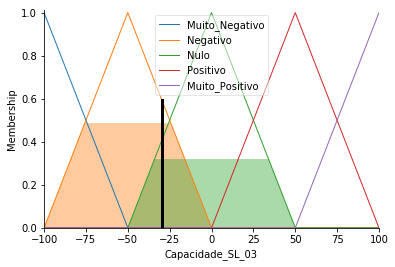

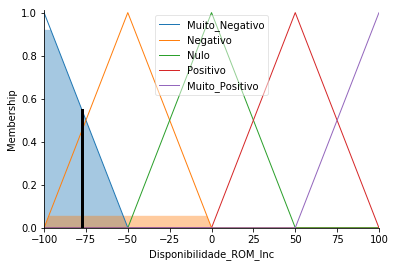

In [0]:
Controle_Capacidade_Silo03_Grad.input['Nivel_Silo_03'] = 90
Controle_Capacidade_Silo03_Grad.input['Nivel_Silo_03_Grad'] = -4
Controle_Capacidade_Silo03_Grad.compute()

Capacidade_SL_03_Inc.view(sim=Controle_Capacidade_Silo03_Grad)


Controle_Disponibilidade_ROM.input['Disponibilidade_ROM'] = 30
Controle_Disponibilidade_ROM.input['Disponibilidade_ROM_Grad'] = -8
Controle_Disponibilidade_ROM.compute()

Disponibilidade_ROM_Inc.view(sim=Controle_Disponibilidade_ROM)
    


# Simulação do Controle

In [0]:

Controle_Carga_Circulante_BR_Grad.input['Corrente_TC_05_Grad'] = 1
Controle_Carga_Circulante_BR_Grad.input['Nivel_SL_04_Grad'] = -7

Controle_Carga_Circulante_BR_Grad.compute()

Carga_Circulante_Virtual += Controle_Carga_Circulante_BR_Grad.output['Carga_Circulante_BR_Grad']

Controle_Eficiencia_BR_Grad.input['Corrente_BR'] = 32
Controle_Eficiencia_BR_Grad.input['Corrente_BR_Grad'] = 3

Controle_Eficiencia_BR_Grad.compute()

Carga_Circulante_Virtual += Controle_Eficiencia_BR_Grad.output['Eficiencia_BR_Grad']

if(Carga_Circulante_Virtual>10):
    Carga_Circulante_Virtual = 10

if(Carga_Circulante_Virtual<-10):
    Carga_Circulante_Virtual = -10

Corrente_TC_05_Grad.view(sim=Controle_Carga_Circulante_BR_Grad)
Nivel_SL_04_Grad.view(sim=Controle_Carga_Circulante_BR_Grad)
Carga_Circulante_BR_Grad_Inc.view(sim=Controle_Carga_Circulante_BR_Grad)

print("CARGA CIRCULANTE VIRTUAL = " + str(Carga_Circulante_Virtual))


ValueError: Membership function '0' does not exist for Antecedent Carga_Circulante_Virtual.
Available options: 'Baixo'; 'Medio', or 'Alto'.